In [ ]:
!pip install opendatasets


In [ ]:
import pandas as pd

In [ ]:
!mkdir -p ~/. kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:26<00:00, 170MB/s]
100% 2.70G/2.70G [00:26<00:00, 109MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 17572 files belonging to 38 classes.


In [ ]:
# add preprocessing layers to the front of VGG
model = Sequential()
vgg = VGG16(input_shape=[128, 128] + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# DO NOT TRAIN EXISTING WEIGHTS
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_sc

In [ ]:
# our layers - you can add more if you want
X = Flatten()(vgg.output)

In [ ]:
# X = Dense(1000, activation='relu')(X)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(X)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
#View the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │         311,334 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,026,022 (57.32 MB)

 Trainable params: 311,334 (1.19 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
    run_eagerly=True
)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 566s 254ms/step - accuracy: 0.7250 - loss: 0.9555 - val_accuracy: 0.8739 - val_loss: 0.3836
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 555s 252ms/step - accuracy: 0.8818 - loss: 0.3542 - val_accuracy: 0.9045 - val_loss: 0.2925
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 556s 249ms/step - accuracy: 0.9032 - loss: 0.2903 - val_accuracy: 0.8999 - val_loss: 0.3200
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 547s 248ms/step - accuracy: 0.9124 - loss: 0.2625 - val_accuracy: 0.9179 - val_loss: 0.2577
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 561s 248ms/step - accuracy: 0.9230 - loss: 0.2331 - val_accuracy: 0.9099 - val_loss: 0.2921
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 551s 250ms/step - accuracy: 0.9242 - loss: 0.2252 - val_accuracy: 0.9271 - val_loss: 0.2325
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 558s 249ms/step - accuracy: 0.9313 - loss: 0.2062 - val_accuracy: 0.9164 - val_loss: 0.2915
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 546s 248ms/step - accuracy: 0.9

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.models import Model
# import numpy as np


# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Wrap data loading in a try-except block to catch errors
# try:
#     training_set = train_datagen.flow_from_directory(
#         '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
#         target_size=(128, 128),
#         batch_size=32,
#         class_mode='categorical'
#     )

#     test_set = test_datagen.flow_from_directory(
#         '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
#         target_size=(128, 128),
#         batch_size=32,
#         class_mode='categorical'
#     )
# except Exception as e:
#     print(f"An error occurred while loading data: {e}")
#     raise  # Re-raise the exception to stop execution


# # Check if test_set is empty or has issues
# if len(test_set) == 0 or len(test_set.classes) != training_set.num_classes:
#     print("Skipping validation due to empty or problematic test_set.")
#     # Train without validation data
#     r = model.fit(
#         training_set,
#         epochs=20,
#         steps_per_epoch=len(training_set)
#     )
# else:
#     # Proceed with validation
#     r = model.fit(
#         training_set,
#         validation_data=test_set,
#         epochs=20,
#         steps_per_epoch=len(training_set),
#         validation_steps=len(test_set),
#         validation_freq=1
#     )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Skipping validation due to empty or problematic test_set.
Epoch 1/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 523s 237ms/step - accuracy: 0.9294 - loss: 0.2110
Epoch 2/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 566s 239ms/step - accuracy: 0.9348 - loss: 0.1931
Epoch 4/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 525s 239ms/step - accuracy: 0.9394 - loss: 0.1814
Epoch 6/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 564s 240ms/step - accuracy: 0.9366 - loss: 0.1923
Epoch 8/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 565s 241ms/step - accuracy: 0.9445 - loss: 0.1689
Epoch 10/2

In [ ]:
# # Ensure that 'test_set' is properly formatted and has data for all expected classes.
# # Check if the directory path for test_set is correct and contains images:
# print(len(test_set))
# # If the directory is empty or the image format is wrong, it will result in len(test_set) being 0
# # You may need to debug why test_set is not loaded correctly.
# # Make sure that:
# # - The directory path is correct.
# # - The images are in a format supported by Keras (e.g., JPEG, PNG).
# # - The directory has subfolders for each class in 'categorical' mode.
# # Consider using try-except block to catch potential errors during data loading:
# try:
#     training_set = train_datagen.flow_from_directory(
#         '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
#         target_size=(128, 128),
#         batch_size=32,
#         class_mode='categorical'
#     )

#     test_set = test_datagen.flow_from_directory(
#         '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
#         target_size=(128, 128),
#         batch_size=32,
#         class_mode='categorical'
#     )
# except Exception as e:
#     print(f"An error occurred while loading data: {e}")

# # Add a check to skip validation if test_set is empty or has class imbalance
# if len(test_set) > 0:  # Proceed with validation only if test_set is not empty
#     r = model.fit(
#         training_set,
#         validation_data=test_set,
#         epochs=10,
#         steps_per_epoch=len(training_set),
#         validation_steps=len(test_set),
#         validation_freq=1
#     )
# else:
#     print("Skipping validation due to empty or problematic test_set.")
#     r = model.fit(
#         training_set,
#         epochs=10,
#         steps_per_epoch=len(training_set),
#     )

550
Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 590s 264ms/step - accuracy: 0.7245 - loss: 0.9566 - val_accuracy: 0.8430 - val_loss: 0.4801
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# # fit the model
# r = model.fit(
#     training_set,
#     validation_data=test_set,
#     epochs=10,
#     steps_per_epoch=len(training_set),
#     validation_steps=len(test_set),
#     validation_freq=1
# )

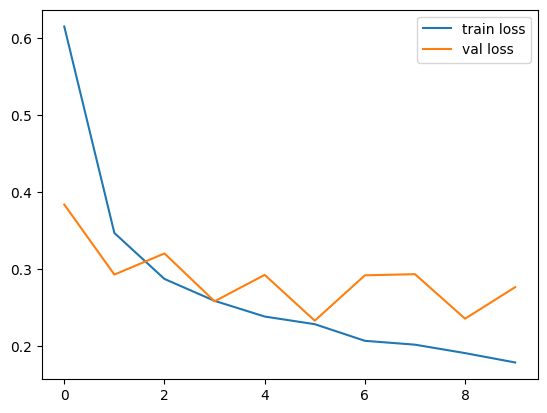

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
from keras.models import load_model
model.save('plant_vgg16.h5')

In [ ]:
model.save('plant_vgg16.keras')

In [ ]:
tf.keras.saving.save_model(model, 'plant_vgg16.keras')

AttributeError: module 'tensorflow.keras' has no attribute 'saving'